In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_raw = pd.read_csv("./TestDataSet.csv")
test_raw.head()

,Company Symbol,Company Name,FDS Ticker Symbol,Sedol,Entity Country Incorp,MSCI Country,Curncy Iso,Value Traded,Market Value,Unnamed: 9,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Boeing Company,BA-US,2108601,United States,United States,USD,1327808000,263447.00,1,...,90762.0,90079.0,88425.0,88195.0,86623.0,85140.0,83018.0,81208.0,81698.0,78951.0
1,UTX,United Technologies Corporation,UTX-US,2915500,United States,United States,USD,323256200,164934.80,1,...,65196.0,64921.0,64190.0,63007.0,62651.0,62327.0,61901.0,59695.0,57701.0,56226.0
2,LMT,Lockheed Martin Corporation,LMT-US,2522096,United States,United States,USD,281338700,143118.00,1,...,45600.0,44603.0,44836.0,44938.0,45358.0,45924.0,46446.0,46959.0,47182.0,47294.0
3,UPS,"United Parcel Service, Inc. Class B",UPS-US,2517382,United States,United States,USD,243005600,133350.30,1,...,58258.0,57361.0,56592.0,55831.0,55491.0,55044.0,54543.0,54364.0,54064.0,53708.0
4,RTN,Raytheon Company,RTN-US,2758051,United States,United States,USD,236887500,79148.73,1,...,22826.0,22553.0,22921.0,23335.0,23706.0,24275.0,24477.0,24356.0,24417.0,24419.0


In [3]:
sales_raw = test_raw.drop(columns = ["Company Name","FDS Ticker Symbol","Sedol","Entity Country Incorp",
                                    "MSCI Country","Curncy Iso","Value Traded","Market Value","Unnamed: 9"])
sales_raw_columns = len(sales_raw.columns)
print(f"# columns for sales_raw = {sales_raw_columns}")
sales_raw.head()

# columns for sales_raw = 31


,Company Symbol,GICS Sub Ind Name,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,Net Sales.5,Net Sales.6,Net Sales.7,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Aerospace & Defense,86989.0,92149.0,100657.0,101127.0,98154.0,97317.0,95798.0,93392.0,...,90762.0,90079.0,88425.0,88195.0,86623.0,85140.0,83018.0,81208.0,81698.0,78951.0
1,UTX,Aerospace & Defense,75589.0,72585.0,69639.0,66485.0,64086.0,62612.0,61193.0,59798.0,...,65196.0,64921.0,64190.0,63007.0,62651.0,62327.0,61901.0,59695.0,57701.0,56226.0
2,LMT,Aerospace & Defense,58345.0,57492.0,56463.0,53762.0,54488.0,52339.0,51626.0,51048.0,...,45600.0,44603.0,44836.0,44938.0,45358.0,45924.0,46446.0,46959.0,47182.0,47294.0
3,UPS,Air Freight & Logistics,73238.0,72426.0,71893.0,71911.0,70904.0,69438.0,67705.0,65840.0,...,58258.0,57361.0,56592.0,55831.0,55491.0,55044.0,54543.0,54364.0,54064.0,53708.0
4,RTN,Aerospace & Defense,28694.0,28054.0,27520.0,27058.0,26481.0,25959.0,25615.0,25348.0,...,22826.0,22553.0,22921.0,23335.0,23706.0,24275.0,24477.0,24356.0,24417.0,24419.0


In [4]:
for i in range(2,len(sales_raw.columns)-4):
    new_column_header = "Sales Growth" + str(i)
    sales_raw[new_column_header] = sales_raw.iloc[:,i+4]/sales_raw.iloc[:,i] - 1
 
sales_raw.head()

,Company Symbol,GICS Sub Ind Name,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,Net Sales.5,Net Sales.6,Net Sales.7,...,Sales Growth17,Sales Growth18,Sales Growth19,Sales Growth20,Sales Growth21,Sales Growth22,Sales Growth23,Sales Growth24,Sales Growth25,Sales Growth26
0,BA,Aerospace & Defense,86989.0,92149.0,100657.0,101127.0,98154.0,97317.0,95798.0,93392.0,...,-0.055684,-0.071437,-0.068662,-0.045984,-0.045603,-0.054830,-0.061148,-0.079222,-0.056856,-0.072692
1,UTX,Aerospace & Defense,75589.0,72585.0,69639.0,66485.0,64086.0,62612.0,61193.0,59798.0,...,0.101358,0.049432,-0.000202,-0.031124,-0.039036,-0.039956,-0.035660,-0.052566,-0.079009,-0.097887
2,LMT,Aerospace & Defense,58345.0,57492.0,56463.0,53762.0,54488.0,52339.0,51626.0,51048.0,...,-0.011532,-0.024964,-0.012379,-0.002730,-0.005307,0.029617,0.035909,0.044973,0.040213,0.029832
3,UPS,Air Freight & Logistics,73238.0,72426.0,71893.0,71911.0,70904.0,69438.0,67705.0,65840.0,...,0.003583,-0.010557,-0.026056,-0.043466,-0.047496,-0.040393,-0.036207,-0.026276,-0.025716,-0.024271
4,RTN,Aerospace & Defense,28694.0,28054.0,27520.0,27058.0,26481.0,25959.0,25615.0,25348.0,...,-0.018110,-0.022071,0.007384,0.032248,0.038553,0.076353,0.067885,0.043754,0.029992,0.005932


In [5]:
sales_growth_raw = sales_raw.drop(sales_raw.iloc[:,2:sales_raw_columns],axis = 1)
sales_growth_raw.head()

,Company Symbol,GICS Sub Ind Name,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,...,Sales Growth17,Sales Growth18,Sales Growth19,Sales Growth20,Sales Growth21,Sales Growth22,Sales Growth23,Sales Growth24,Sales Growth25,Sales Growth26
0,BA,Aerospace & Defense,0.128350,0.056083,-0.048273,-0.076488,-0.069727,-0.065949,-0.030095,0.012624,...,-0.055684,-0.071437,-0.068662,-0.045984,-0.045603,-0.054830,-0.061148,-0.079222,-0.056856,-0.072692
1,UTX,Aerospace & Defense,-0.152178,-0.137398,-0.121283,-0.100579,-0.081952,-0.070753,-0.055186,-0.039851,...,0.101358,0.049432,-0.000202,-0.031124,-0.039036,-0.039956,-0.035660,-0.052566,-0.079009,-0.097887
2,LMT,Aerospace & Defense,-0.066107,-0.089630,-0.085667,-0.050482,-0.088552,-0.062936,-0.045558,-0.022116,...,-0.011532,-0.024964,-0.012379,-0.002730,-0.005307,0.029617,0.035909,0.044973,0.040213,0.029832
3,UPS,Air Freight & Logistics,-0.031869,-0.041256,-0.058253,-0.084424,-0.100023,-0.097339,-0.091943,-0.081075,...,0.003583,-0.010557,-0.026056,-0.043466,-0.047496,-0.040393,-0.036207,-0.026276,-0.025716,-0.024271
4,RTN,Aerospace & Defense,-0.077124,-0.074677,-0.069222,-0.063198,-0.063366,-0.054201,-0.051103,-0.050458,...,-0.018110,-0.022071,0.007384,0.032248,0.038553,0.076353,0.067885,0.043754,0.029992,0.005932


In [6]:
sales_grows_by_cate = sales_growth_raw.groupby(["GICS Sub Ind Name"]).mean()
sales_grows_by_cate

,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,Sales Growth10,Sales Growth11,...,Sales Growth17,Sales Growth18,Sales Growth19,Sales Growth20,Sales Growth21,Sales Growth22,Sales Growth23,Sales Growth24,Sales Growth25,Sales Growth26
GICS Sub Ind Name,,,,,,,,,,,,,,,,,,,,,
Advertising,-0.033678,-0.044314,-0.067179,-0.085753,-0.080245,-0.064554,-0.024909,0.007485,0.024909,0.032997,...,0.001754,-0.024626,-0.044026,-0.057429,-0.068681,-0.049737,-0.024375,-0.002330,0.020450,0.029346
Aerospace & Defense,-0.057328,-0.032192,-0.059240,-0.062815,-0.063362,-0.065133,-0.050041,-0.031100,-0.027431,-0.015570,...,-0.012653,-0.012120,-0.011578,-0.022985,-0.031231,-0.045133,-0.046313,-0.041712,-0.028410,-0.015725
Agricultural & Farm Machinery,0.029722,0.012281,-0.050186,-0.089034,-0.117068,-0.129117,-0.117362,-0.095095,-0.061134,-0.037634,...,0.185179,0.181816,0.133207,0.113181,0.085074,0.046658,0.019283,-0.045314,-0.093549,-0.107139
Agricultural Products,0.020476,0.037860,0.019747,0.008709,-0.008924,-0.019812,-0.008683,-0.023057,-0.025096,-0.023011,...,0.118968,0.046089,0.003705,-0.068060,-0.112649,-0.107988,-0.091627,-0.044180,0.003597,-0.000353
Air Freight & Logistics,-0.000505,-0.034135,-0.088361,-0.128094,-0.147130,-0.145103,-0.128582,-0.107246,-0.087121,-0.078077,...,-0.126938,-0.135367,-0.142292,-0.158243,-0.162614,-0.155950,-0.147207,-0.127838,-0.123615,-0.130637
Airlines,-0.036149,-0.046300,-0.048274,-0.058389,-0.064861,-0.064187,-0.078192,-0.074552,-0.064084,-0.051504,...,-0.020480,-0.037097,-0.056045,-0.081482,-0.090730,-0.090549,-0.082163,-0.058060,-0.045307,-0.033451


<function matplotlib.pyplot.show(*args, **kw)>

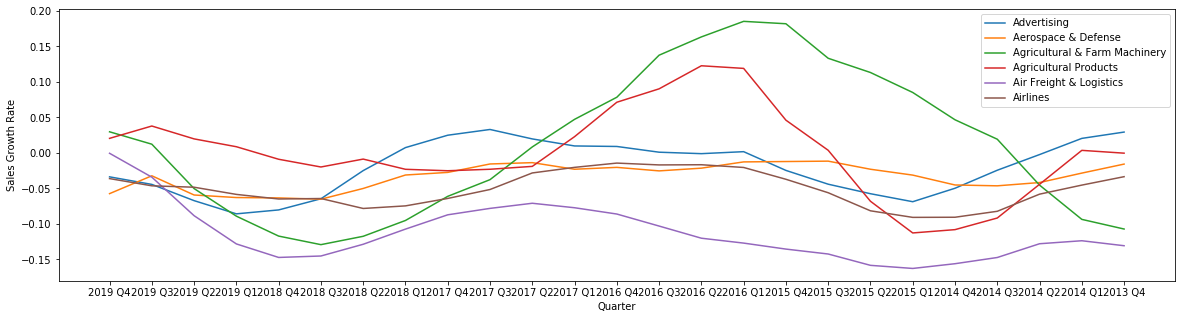

In [30]:
line_x = ["2019 Q4","2019 Q3","2019 Q2","2019 Q1","2018 Q4","2018 Q3","2018 Q2","2018 Q1","2017 Q4","2017 Q3","2017 Q2",
          "2017 Q1","2016 Q4","2016 Q3","2016 Q2","2016 Q1","2015 Q4","2015 Q3","2015 Q2","2015 Q1","2014 Q4","2014 Q3",
          "2014 Q2","2014 Q1","2013 Q4"]
plt.figure(figsize=(20,5))
plt.plot(line_x,sales_grows_by_cate.iloc[0],label = "Advertising")
plt.plot(line_x,sales_grows_by_cate.iloc[1],label = "Aerospace & Defense")
plt.plot(line_x,sales_grows_by_cate.iloc[2],label = "Agricultural & Farm Machinery")
plt.plot(line_x,sales_grows_by_cate.iloc[3],label = "Agricultural Products")
plt.plot(line_x,sales_grows_by_cate.iloc[4],label = "Air Freight & Logistics")
plt.plot(line_x,sales_grows_by_cate.iloc[5],label = "Airlines")
plt.xlabel("Quarter")
plt.ylabel("Sales Growth Rate")
plt.legend()
plt.show